### Charger les données et les transformer en images de 28 x 28 pixels

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, RandomFlip, RandomRotation, RandomZoom, RandomTranslation
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop

In [2]:
X_train = pd.read_csv("./sign_mnist_train.csv")
X_test = pd.read_csv("./sign_mnist_test.csv")

In [3]:
X_train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [4]:
X_test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


In [5]:
X_train, X_val = train_test_split(X_train, test_size=1/6)

In [6]:
target = "label"

In [7]:
y_train = X_train[target]
y_val = X_val[target]
y_test = X_test[target]

In [8]:
X_train = X_train.drop(target, axis=1)
X_val = X_val.drop(target, axis=1)
X_test = X_test.drop(target, axis=1)

In [9]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(22879, 784)
(4576, 784)
(7172, 784)
(22879,)
(4576,)
(7172,)


In [10]:
image_w = 28
image_h = 28

In [11]:
df_filtered = y_test[y_test == 10]

In [12]:
df_filtered

2       10
6       10
24      10
60      10
65      10
        ..
7083    10
7124    10
7127    10
7138    10
7162    10
Name: label, Length: 331, dtype: int64

In [13]:
labels = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    # 'J' est exclu
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24
    # 'Z' est exclu
}

In [14]:
X_train_image = X_train.to_numpy().reshape(X_train.shape[0], image_w, image_h)

In [15]:
X_train_image.shape

(22879, 28, 28)

In [16]:
print(y_train.unique())  # Affiche les valeurs uniques de y_train pour comprendre son contenu

[24  7 17 15 19  4 20 23 21 10  8 18 13 12  2 11 22  3 16  0  1 14  5  6]


In [17]:
# Inverser le dictionnaire labels pour obtenir une correspondance de nombre à lettre
inv_labels = {v: k for k, v in labels.items()}

Y


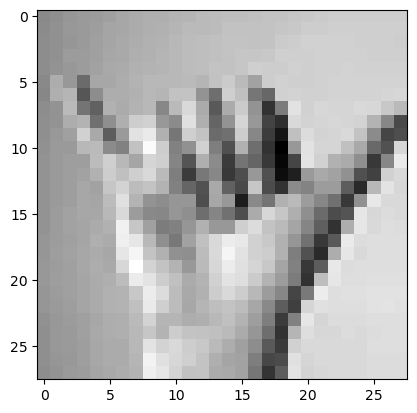

H


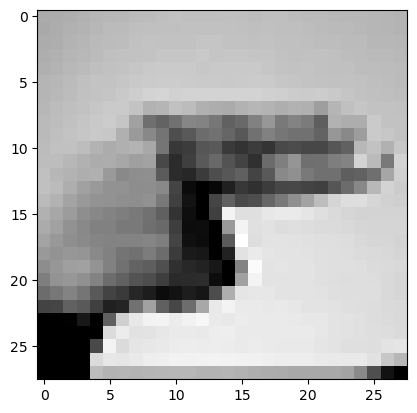

R


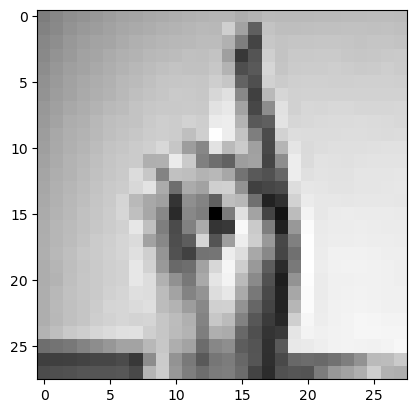

P


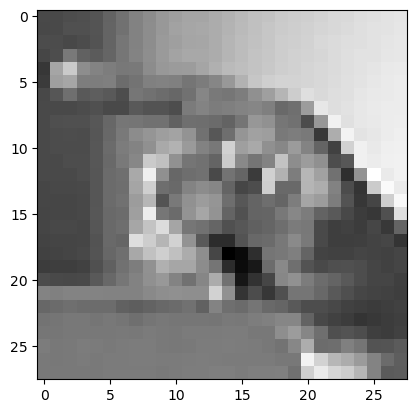

T


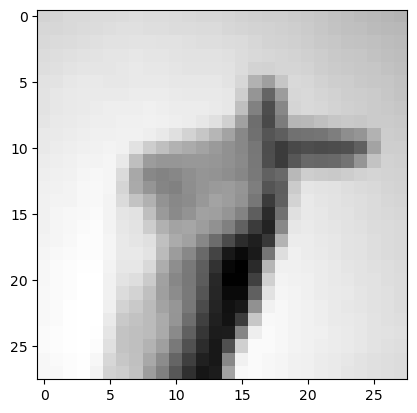

E


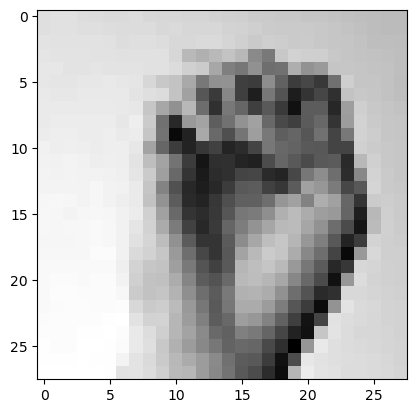

U


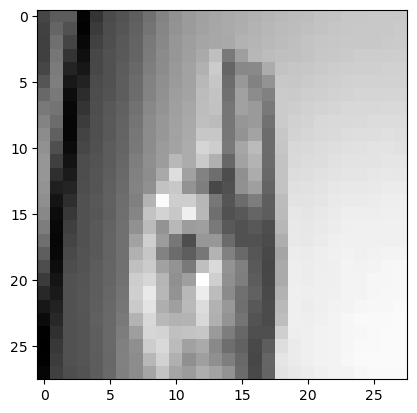

U


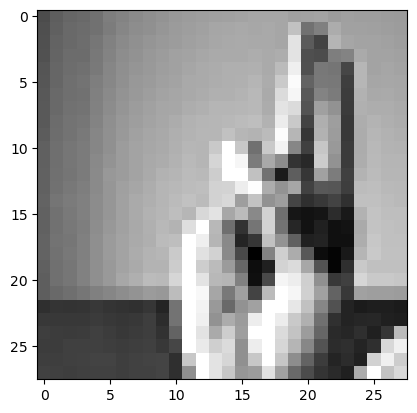

X


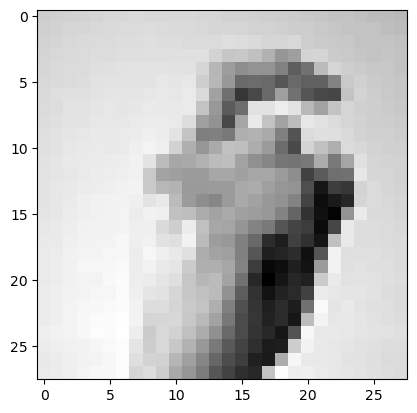

V


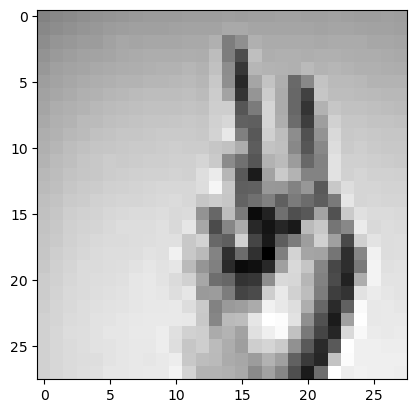

In [18]:
plt.gray()
for i in range(10):
    print(inv_labels[y_train.iloc[i]])  # Utiliser le dictionnaire inversé
    plt.imshow(X_train_image[i])
    plt.show()

### Ce dataset est-il équilibré ? Est-il nécessaire de rééquilibrer les données ? Le faire si besoin

In [19]:
# Compter le nombre d'occurrences de chaque classe
class_distribution = y_train.value_counts()
print(class_distribution)

label
17    1083
16    1066
11    1047
22    1013
5     1004
14     998
18     995
3      993
19     988
8      975
20     968
2      968
23     967
13     947
10     927
0      925
24     924
6      921
15     906
21     902
12     872
7      842
1      837
4      811
Name: count, dtype: int64


In [20]:
!pip install imbalanced-learn

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE sur les données d'entraînement
X_train, y_train = smote.fit_resample(X_train, y_train)

# Afficher la nouvelle distribution des classes après rééquilibrage
print(Counter(y_train))

Counter({24: 1083, 7: 1083, 17: 1083, 15: 1083, 19: 1083, 4: 1083, 20: 1083, 23: 1083, 21: 1083, 10: 1083, 8: 1083, 18: 1083, 13: 1083, 12: 1083, 2: 1083, 11: 1083, 22: 1083, 3: 1083, 16: 1083, 0: 1083, 1: 1083, 14: 1083, 5: 1083, 6: 1083})


### Construire un réseau de neurones convolutif pour résoudre ce problème de classification. Il devra contenir au minimum les éléments suivants : couches de convolution, couche de "pooling", "dropout", couches cachées complètement connectées. Vous êtes libres d'ajouter d'autres éléments

### Prétraitement des données

In [22]:
X_train_norm = X_train/255
X_val_norm = X_val/255
X_test_norm = X_test/255

In [23]:
y_train_cat = to_categorical(y_train, num_classes=25)
y_val_cat = to_categorical(y_val, num_classes=25)
y_test_cat = to_categorical(y_test, num_classes=25)

In [24]:
print(y_train_cat.shape)
print(y_val_cat.shape)
print(y_test_cat.shape)

(25992, 25)
(4576, 25)
(7172, 25)


### Création du modèle de convolution

In [25]:
X_train_image = X_train.to_numpy().reshape(X_train.shape[0], image_w, image_h, 1)
X_val_image = X_val.to_numpy().reshape(X_val.shape[0], image_w, image_h, 1)
X_test_image = X_test.to_numpy().reshape(X_test.shape[0], image_w, image_h, 1)

In [26]:
X_train_image.shape

(25992, 28, 28, 1)

In [27]:
input_shape = X_train_image.shape[1:]
output_dim = y_train_cat.shape[1]

In [28]:
print(input_shape)
print(output_dim)

(28, 28, 1)
25


In [29]:
X_train_image_norm = X_train_image/255
X_val_image_norm = X_val_image/255
X_test_image_norm = X_test_image/255

In [30]:
def create_cnn_model(activation='relu', optimizer='adam', nb_hidden_layers=2, nb_units=64):
    model = Sequential()

    model.add(Input(shape=input_shape))

    model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  

    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))  
    model.add(Dense(64, activation="relu"))

    model.add(Dense(output_dim, activation="softmax"))

    model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["categorical_accuracy"])

    model.summary()

    return model

In [31]:
model_cnn = create_cnn_model(activation='relu', optimizer='adam', nb_hidden_layers=2, nb_units=64)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,137 (977.10 KB)

 Trainable params: 250,137 (977.10 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
nb_epochs = 50

### Entraîner le modèle construit à la question précédente et mesurer sa performance

In [33]:
history_cnn = model_cnn.fit(
    X_train_image_norm,
    y_train_cat,
    epochs=nb_epochs,
    validation_data=(X_val_image_norm, y_val_cat),
    callbacks=[EarlyStopping(patience=3)]
)

Epoch 1/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - categorical_accuracy: 0.1304 - loss: 2.8528 - val_categorical_accuracy: 0.8590 - val_loss: 0.5267
Epoch 2/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - categorical_accuracy: 0.7392 - loss: 0.7399 - val_categorical_accuracy: 0.9771 - val_loss: 0.1213
Epoch 3/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - categorical_accuracy: 0.8632 - loss: 0.3908 - val_categorical_accuracy: 0.9919 - val_loss: 0.0456
Epoch 4/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - categorical_accuracy: 0.9136 - loss: 0.2542 - val_categorical_accuracy: 0.9996 - val_loss: 0.0109
Epoch 5/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - categorical_accuracy: 0.9420 - loss: 0.1690 - val_categorical_accuracy: 0.9993 - val_loss: 0.0078
Epoch 6/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - categorical_accuracy: 0.9562 - loss: 0.1317 - val_categorical_accuracy: 0.9989 - val_loss: 0.0059
Epoch 7/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - categorical_accuracy

In [34]:
def plot_history(history):
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    hist_data = history.history
    hist_data["epochs"] = list(range(1, len(history.history["loss"])+1))

    hist_data = pd.DataFrame(hist_data)
    sns.lineplot(data=hist_data, x="epochs", y="loss", ax=axes[0], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_loss", ax=axes[0], color = "orange")

    sns.lineplot(data=hist_data, x="epochs", y="categorical_accuracy", ax=axes[1], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_categorical_accuracy", ax=axes[1], color = "orange")

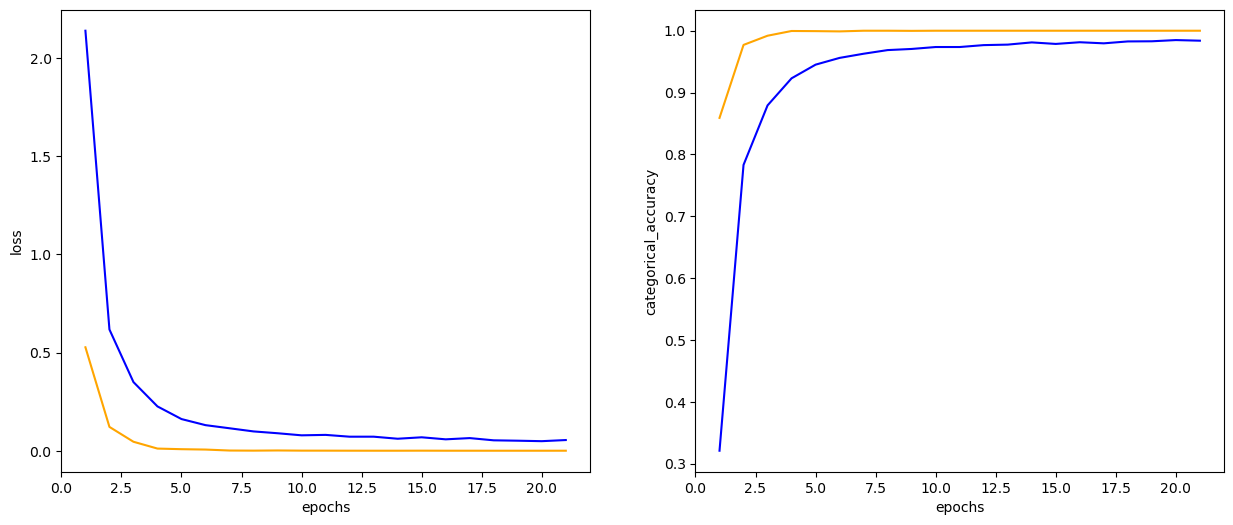

In [35]:
plot_history(history_cnn)

### Evaluation du modèle

In [36]:
loss, accuracy = model_cnn.evaluate(X_test_image_norm, y_test_cat)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.9706 - loss: 0.1324
Loss: 0.11798509210348129
Accuracy: 0.9712771773338318


In [37]:
y_pred = model_cnn.predict(X_test_image_norm)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [38]:
y_pred_final = np.argmax(y_pred,axis=1)+1
y_test_final = np.argmax(y_test_cat,axis=1)+1

In [39]:
mean_absolute_error(y_pred_final, y_test_final)

0.3318460680423871

### Faire une recherche de meilleurs hyperparamètres avec la fonction "GridSearchCV"

In [40]:
!pip install scikeras

In [41]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [42]:
def create_cnn_model_2(activation='relu', optimizer='adam', nb_units=64):
    model = Sequential()

    model.add(Input(shape=input_shape))

    model.add(Conv2D(nb_units//2, kernel_size=(3, 3), activation=activation, padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  

    model.add(Conv2D(nb_units, kernel_size=(3, 3), activation=activation, padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(nb_units*2, kernel_size=(3, 3), activation=activation, padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(128, activation=activation))
    model.add(Dropout(0.5))  
    model.add(Dense(64, activation=activation))

    model.add(Dense(output_dim, activation="softmax"))

    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

    return model

In [43]:
hyperparameters = {
    'model__activation': ['relu', 'sigmoid'],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__nb_units': [64, 128]
}

In [44]:
model = KerasClassifier(build_fn=create_cnn_model_2, verbose=0)

In [45]:
grid = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=2)

In [46]:
grid_result = grid.fit(X_train_image_norm, y_train_cat)

C:\Users\anasa\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\anasa\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\anasa\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\anasa\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a 

In [47]:
# Meilleurs hyperparamètres trouvés
best_params = grid_result.best_params_
print("Meilleurs paramètres :", best_params)

# Meilleur estimateur (modèle)
best_model = grid_result.best_estimator_
print("Meilleur modèle :", best_model)

# Meilleur score de validation croisée
best_score = grid_result.best_score_
print("Meilleur score :", best_score)

Meilleurs paramètres : {'model__activation': 'relu', 'model__nb_units': 128, 'model__optimizer': 'adam'}
Meilleur modèle : KerasClassifier(
	model=None
	build_fn=<function create_cnn_model_2 at 0x0000019BAD1271A0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
	model__activation=relu
	model__nb_units=128
	model__optimizer=adam
)
Meilleur score : 0.3668436441982148


### Sauvegarder votre meilleur modèle

In [48]:
# Évaluation de model_cnn (modèle de base) sur les données de test
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_image_norm, y_test_cat, verbose=0)
print(f"Loss (model_cnn): {loss_cnn}")
print(f"Accuracy (model_cnn): {accuracy_cnn}")

# Meilleurs hyperparamètres trouvés par GridSearchCV
best_params = grid_result.best_params_
print("Meilleurs paramètres :", best_params)

# Meilleur score de validation croisée (GridSearchCV)
best_score = grid_result.best_score_
print(f"Best cross-validation score (best_model): {best_score}")

# Comparaison des scores
if accuracy_cnn > best_score:
    best_model = model_cnn
else:
    best_model = best_model.model

Loss (model_cnn): 0.11798509210348129
Accuracy (model_cnn): 0.9712771773338318
Meilleurs paramètres : {'model__activation': 'relu', 'model__nb_units': 128, 'model__optimizer': 'adam'}
Best cross-validation score (best_model): 0.3668436441982148


### Utiliser une technique d'augmentation d'images. Les résultats de vos modèles s'en trouvent-ils améliorés ? Était-ce prévisible ?

In [49]:
def create_cnn_model_with_augmentation(activation='relu', optimizer='adam', nb_units=64):
    model = Sequential()

    # Couche d'entrée avec augmentation des données
    model.add(Input(shape=input_shape))
    model.add(RandomFlip("horizontal"))
    model.add(RandomRotation(0.05))
    model.add(RandomZoom(0.2))
    model.add(RandomTranslation(height_factor=0.1, width_factor=0.1))

    # Couches de convolution
    model.add(Conv2D(nb_units//2, kernel_size=(3, 3), activation=activation, padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(nb_units, kernel_size=(3, 3), activation=activation, padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(nb_units*2, kernel_size=(3, 3), activation=activation, padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Applatissement des images convoluées
    model.add(Flatten())

    # Couches denses servant à la classification
    model.add(Dense(128, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation=activation))

    model.add(Dense(output_dim, activation="softmax"))

    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

    return model

In [50]:
model_cnn_augmentation = create_cnn_model_with_augmentation(activation=best_params['model__activation'],
                                optimizer=best_params['model__optimizer'],
                                nb_units=best_params['model__nb_units'])

Remplacer les paramètres du fit par best_params

In [51]:
history_cnn_augmentation = model_cnn_augmentation.fit(
    X_train_image_norm,
    y_train_cat,
    epochs=nb_epochs,
    validation_data=(X_val_image_norm, y_val_cat),
    callbacks=[EarlyStopping(patience=3)]
)

Epoch 1/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 56s 66ms/step - categorical_accuracy: 0.0481 - loss: 3.1822 - val_categorical_accuracy: 0.1954 - val_loss: 2.4039
Epoch 2/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - categorical_accuracy: 0.2067 - loss: 2.4789 - val_categorical_accuracy: 0.4816 - val_loss: 1.5291
Epoch 3/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - categorical_accuracy: 0.4016 - loss: 1.7816 - val_categorical_accuracy: 0.7242 - val_loss: 0.8598
Epoch 4/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 54s 67ms/step - categorical_accuracy: 0.5178 - loss: 1.3960 - val_categorical_accuracy: 0.8099 - val_loss: 0.5609
Epoch 5/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 53s 65ms/step - categorical_accuracy: 0.5975 - loss: 1.1509 - val_categorical_accuracy: 0.8440 - val_loss: 0.4721
Epoch 6/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 54s 67ms/step - categorical_accuracy: 0.6476 - loss: 1.0286 - val_categorical_accuracy: 0.8676 - val_loss: 0.3679
Epoch 7/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - categorical_accuracy

In [52]:
# Modèle sans augmentation d'images
loss_no_aug, acc_no_aug = best_model.evaluate(X_test_image_norm, y_test_cat, verbose=0)
print(f"Accuracy without augmentation: {acc_no_aug}")

# Modèle avec augmentation d'images
loss_aug, acc_aug = model_cnn_augmentation.evaluate(X_test_image_norm, y_test_cat, verbose=0)
print(f"Accuracy with augmentation: {acc_aug}")

# Comparaison des résultats
if acc_aug > acc_no_aug:
    print("Le modèle avec augmentation d'images est meilleur.")
    best_model.save('best_model.keras')
else:
    print("Le modèle sans augmentation d'images est meilleur.")
    model_cnn_augmentation.save('best_model.keras')

Accuracy without augmentation: 0.9712771773338318
Accuracy with augmentation: 0.9765755534172058
Le modèle avec augmentation d'images est meilleur.


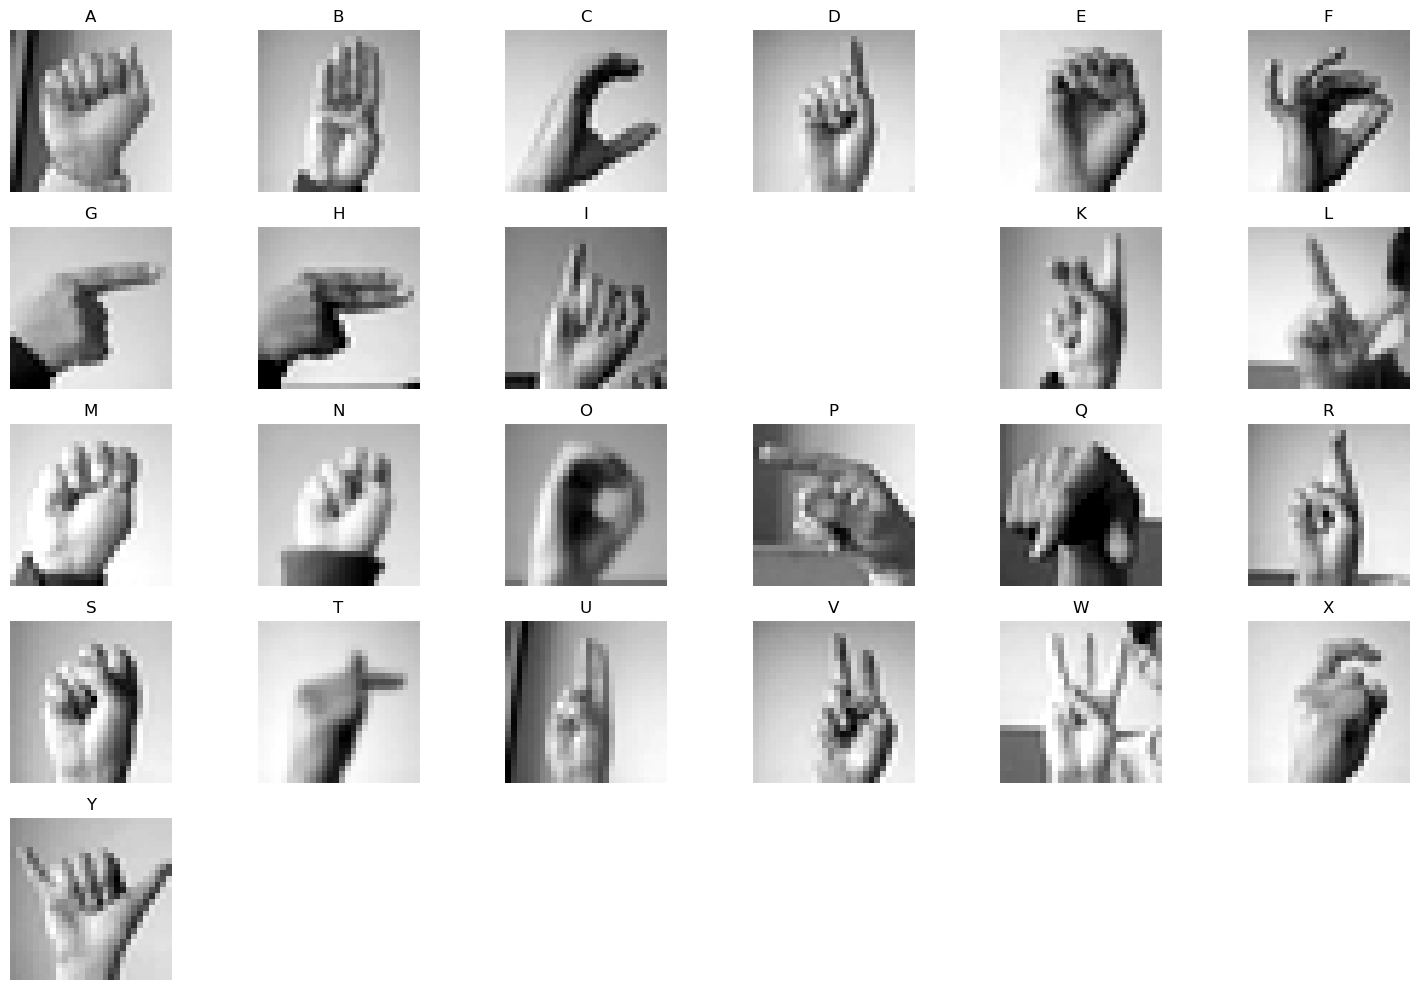

In [53]:
# Initialiser une figure pour afficher les images
plt.figure(figsize=(15, 10))

# Parcourir les lettres de A à Z
for letter in range(26):
    # Trouver un indice pour chaque lettre
    indices = [i for i, label in enumerate(y_train) if label == letter]
    if indices:  # Vérifier si des images existent pour cette lettre
        plt.subplot(5, 6, letter + 1)  # 5 lignes, 6 colonnes
        plt.imshow(X_train_image[indices[0]])  # Afficher la première image pour cette lettre
        plt.title(inv_labels[letter])  # Titre de la lettre
        plt.axis('off')  # Pas d'axes

plt.tight_layout()
plt.show()